# Solving Statics Problem using SymPy


## Question

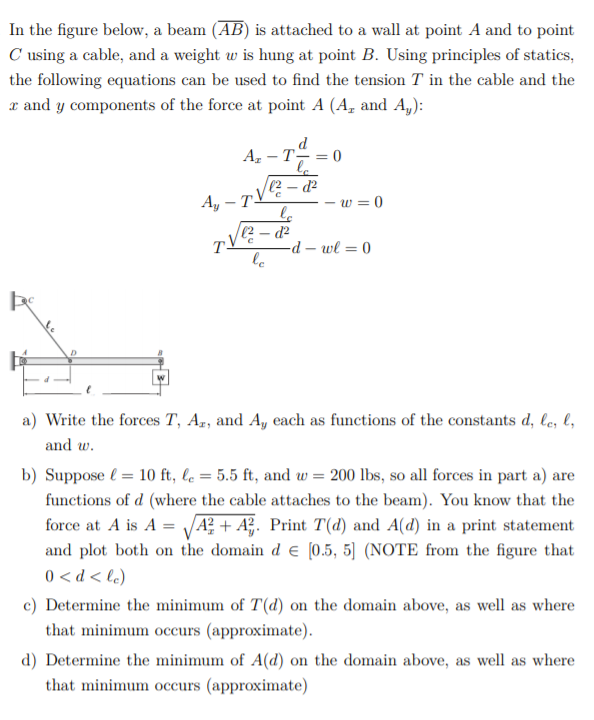

## Solution

### Installing [SymPy](https://pypi.org/project/sympy/) using [pip](https://pypi.org/project/pip/)


~~~bash
python3 -m pip install sympy
~~~

### Importing necessary modules from SymPy

* [printing](https://docs.sympy.org/latest/modules/printing.html) - Useful for printing complex equations
* [plotting](https://docs.sympy.org/latest/modules/plotting.html) - To print necessary plots in part (b) of question



In [ ]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy.plotting import plot
from sympy import *
import sympy as sp

### Inserting equations and displaying the result

Given equations are


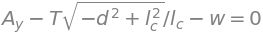

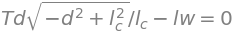

In [3]:
eq1 = sp.Function('eq1')
eq2 = sp.Function('eq2')
eq3 = sp.Function('eq3')
eq4 = sp.Function('eq4')

Ax, Ay, A, T, lc, l, d, w = sp.symbols('A_x A_y A T l_c l d w')

#defining the equations
eq1 = Eq(Ax-T*(d/lc),0)
eq2 = Eq(Ay-(T*(sqrt(lc**2 - d**2))/lc)-w, 0)
eq3 = Eq((T*(sqrt(lc**2 - d**2)/lc)*d)-w*l, 0)

print("Given equations are")
display(eq1)
display(eq2)
display(eq3)

### Solving the given equations using ``solve``

Solving the given three equations gives the three forces **$ T $**, **$ {A_x} $** and **$ A_y $** in terms of *$ d, l_c\ , l $ and $ w $*

The forces in terms of given constants are


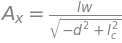

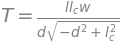

In [4]:
#----------------------------------------PART (a)----------------------------------------#

#solving the above three equations in terms of constants l, l_c, w and d
print("The forces in terms of given constants are")
solution = solve([eq1, eq2, eq3], [Ax, Ay, T])

#to display result in proper format
solution_dict = {sympify(key): sympify(solution[key], locals={'A_x': Ax, 'A_y' : Ay, 'T' : T}) for key in solution}   
for key in solution_dict:
    display(Eq(key, dict_parser(key, solution_dict)))

### Subsituting given values in above equations

Substiting *$ l = 10\,ft\ , \, l_c=5.5\,ft \ $ and $ w = 200 \, lbs $* in given equations and displaying the results



Equations after subsituting given values are


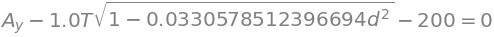

In [5]:
#----------------------------------------PART (b)----------------------------------------#

#equations after subsituting given values of
#l = 10 ft
#l_c = 5.5 ft
#w = 200 lbs
eq1_s = eq1.subs([(l, 10), (lc, 5.5), (w, 200)])
eq2_s = eq2.subs([(l, 10), (lc, 5.5), (w, 200)])
eq3_s = eq3.subs([(l, 10), (lc, 5.5), (w, 200)])

print("\n\nEquations after subsituting given values are")
display(eq1_s)
display(eq2_s)
display(eq3_s)

### Solving above equations in terms of $ d $


On solving above three equations in terms of $ d $ gives **$ T $**, **$ {A_x} $** and **$ A_y $** as function of a single variable $ d $


The quantities in terms of d are


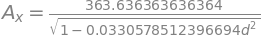

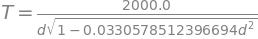

In [6]:
#solving the above three equations in terms of d
print("\nThe quantities in terms of d are")
solution_s = solve([eq1_s, eq2_s, eq3_s], [Ax, Ay, T])

#printing the solved equations
solution_s_dict = {sympify(key): sympify(solution_s[key], locals={'A_x': Ax, 'A_y' : Ay, 'T' : T}) for key in solution}   
for key in solution_s_dict:
    display(Eq(key, dict_parser(key, solution_s_dict)))

### Obtaining equation for force $ A $

The resultant of force components **$ A_x $** and **$ A_y $** is obtained as force **$ A $**

By subsituting values of **$ A_x $** and **$ A_y $** in equation **$ A = \sqrt {A_x^2 +A_y^2} $** , force **$ A $** is obtained as a function of $ d $ 

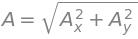

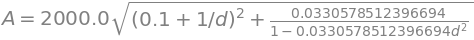

In [8]:
#equation for A (resultant of Ax and Ay)
eq4 = Eq(A, sqrt(Ax**2 + Ay**2))
display(eq4)

#getting equations of Ax and Ay after subsitution
Ax_s = dict_parser(Ax, solution_s_dict)
Ay_s = dict_parser(Ay, solution_s_dict)

#equation of A(d) after subsituting the equation of Ax and Ay
A_s = sqrt(Ax_s**2 + Ay_s**2)
display(Eq(A, A_s))

### Plotting $ A(d) $ and $ T(d) $ in the domain $ d \in [0.5,5]$ 


The the plot of A(d) is


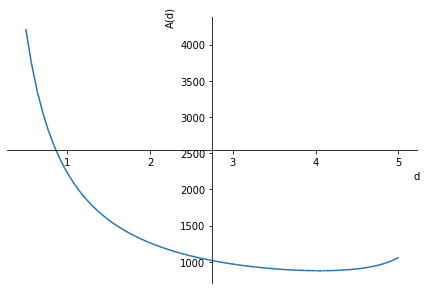


The the plot of T(d) is


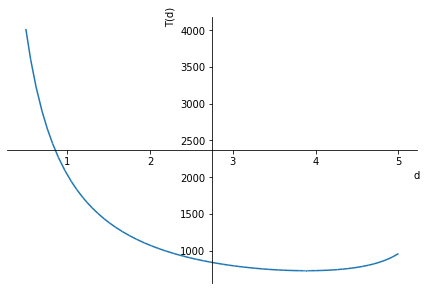

In [9]:
#plotting A(d) as a function of d
print("\nThe the plot of A(d) is")
plot(A_s, (d, 0.5, 5), xlabel="d", ylabel="A(d)")

#getting the equation of T(d) after subsitution of known values
T_s = dict_parser(T, solution_s_dict)
print("\nThe the plot of T(d) is")
plot(T_s, (d, 0.5, 5), xlabel="d", ylabel="T(d)")

### Finding minima of $ T(d) $

For maxima or minima the first derivative of function must be equal to **ZERO**

Hence, $T'(d) = 0$

On solving above equation only those values of $ d $ are to be selected which lie within the given domain $ d \in [0.5,5]$

For a minima to occur at above point required condition is that second derivative of $T(d)$ must be greater than zero (_positive_)

Hence, for minima, $T''(d) > 0$

In [11]:
#----------------------------------------PART (c)----------------------------------------#

#evaluating the derivative of T(d) with respect to d
dTdd = T_s.diff(d)

#equating the derivative of T(d) to zero and solving for d to give the values of minima
eq5 = Eq(dTdd, 0)
extremum_values_d_T = solve(eq5, d)
#evaluating second derivative of T(d) with respect to T
d2Tdd2 = dTdd.diff(d)

for d_min in extremum_values_d_T:
    d2Tdd2_d_min = d2Tdd2.subs(d, d_min)
    
    #condition for minima T''(d_min) > 0
    if d2Tdd2_d_min > 0:
        if 0.5 <= d_min <= 5:
            #saving the minimum value of d within the range in d_min_T variable
            d_min_T = d_min
            print("\n\nThe minima of T(d) occurs at %0.3f" % d_min_T)

#evaluating the minimun value of T(d)
min_T = T_s.subs(d, d_min_T)
print("The minimum value of T(d) at d = %.3f" % d_min_T, " is %.3f" % min_T)



The minima of T(d) occurs at 3.889
The minimum value of T(d) at d = 3.889  is 727.273


### Finding minima of $ A(d) $

Similiar to previous part, for maxima or minima the first derivative of function must be equal to **ZERO**

Hence, $A'(d) = 0$

On solving above equation only those values of $ d $ are to be selected which lie within the given domain $ d \in [0.5,5]$

For a minima to occur at above point required condition is that second derivative of $A(d)$ must be greater than zero (_positive_)

Hence, for minima, $A''(d) > 0$

In [12]:
#----------------------------------------PART (d)----------------------------------------#

#evaluating the derivative of A(d) with respect to d
dAdd = A_s.diff(d)

#equating the derivative of A(d) to zero and solving for d to give the values of minima
eq6 = Eq(dAdd, 0)
extremum_values_d_A = solve(eq6, d)
#evaluating second derivative of T(d) with respect to T
d2Add2 = dAdd.diff(d)

for d_min in extremum_values_d_A:
    #considering only real values of d_min
    check_if_real = d_min.is_real
    if check_if_real == 1:
        d2Add2_d_min = d2Add2.subs(d, d_min)
        #condition for minima T''(d_min) > 0
        if d2Add2_d_min > 0:
            #considering values only within the desired range
            if 0.5 <= d_min <= 5:
            #saving the minimum value of d within the range in d_min_T variable
                d_min_A = d_min
                print("\n\nThe minima of A(d) occurs at %0.3f" % d_min_A)

#evaluating the minimun value of T(d)
min_A = A_s.subs(d, d_min_A)
print("The minimum value of A(d) at d = %.3f" % d_min_A, " is %.3f" % min_A)



The minima of A(d) occurs at 4.051
The minimum value of A(d) at d = 4.051  is 877.643


### Dictionary parser function

A function to parse dictionary obtained after subsituting values in the equations.

This function makes assigning values to newer variables easier. Also, the function allows the equations to be displayed with and $ = $ 'equal to' sign *(displaying a dictionary as it is uses a $ : $ colon to associate variables with the function)*

In [ ]:
#function to print the results
def dict_parser(expr, dict):
    while True:
        new_expr = expr.subs(dict)
        if new_expr == expr:
            return expr
        else:
            expr = new_expr